In [1]:
import torch
from torchvision import datasets        
import torchvision.transforms as transforms

/home/millliono/miniconda3/envs/dev/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Normalize((0.5,), (0.5, ))])
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST(root='./data', train=True,
                          transform=transform, download=True)
testset = datasets.MNIST(root='./data', train=False,
                         transform=transform, download=True)

print("trainset: ", len(trainset))
print("testset: ", len(testset))
# print(trainset[123])

batch_size = 32
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=6)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=True, num_workers=6)

for X, y in testloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

100%|██████████| 9912422/9912422 [00:09<00:00, 1068281.57it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 675889.91it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1039402.54it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2747804.52it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

trainset:  60000
testset:  10000


Shape of X [N, C, H, W]: torch.Size([32, 1, 28, 28])
Shape of y: torch.Size([32]) torch.int64


In [3]:
from torch import nn
from torch import optim
import torch.nn.functional as F

In [4]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(784, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.softmax(x, dim=1)
        return x

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=10, bias=True)
)


In [5]:
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()

In [6]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss = loss.item()
            current = batch * len(X)
            print(f"loss(batch): {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [7]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()

    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    print(f"Test Error: \nAccuracy: {(100*correct/size):>0.1f}%, Avg loss(batch): {test_loss/num_batches:>8f} \n")

In [8]:
epochs = 3
for t in range(epochs):
    print(f"Epoch {t+1}  (batch_size={batch_size}, lr={lr})\n-------------------------------")
    train(trainloader, model, loss_fn, optimizer)
    test(testloader, model, loss_fn)

Epoch 1  (batch_size=32, lr=0.001)
-------------------------------
loss(batch): 2.301195  [    0/60000]
loss(batch): 1.665045  [ 3200/60000]
loss(batch): 1.777200  [ 6400/60000]
loss(batch): 1.646663  [ 9600/60000]
loss(batch): 1.626758  [12800/60000]
loss(batch): 1.618425  [16000/60000]
loss(batch): 1.578489  [19200/60000]
loss(batch): 1.710248  [22400/60000]
loss(batch): 1.605496  [25600/60000]
loss(batch): 1.485946  [28800/60000]
loss(batch): 1.573221  [32000/60000]
loss(batch): 1.558533  [35200/60000]
loss(batch): 1.545492  [38400/60000]
loss(batch): 1.537621  [41600/60000]
loss(batch): 1.553604  [44800/60000]
loss(batch): 1.526326  [48000/60000]
loss(batch): 1.562599  [51200/60000]
loss(batch): 1.523965  [54400/60000]
loss(batch): 1.654455  [57600/60000]
Test Error: 
Accuracy: 92.3%, Avg loss(batch): 1.542558 

Epoch 2  (batch_size=32, lr=0.001)
-------------------------------
loss(batch): 1.538586  [    0/60000]
loss(batch): 1.553196  [ 3200/60000]
loss(batch): 1.558136  [ 6400/6

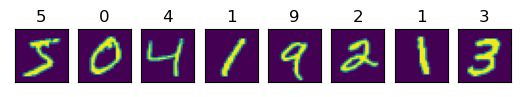

In [9]:
# visualization
import matplotlib.pyplot as plt

for i in range(8):
  plt.subplot(181 + i)
  plt.imshow(trainset[i][0].reshape(28,28))
  plt.xticks([])
  plt.yticks([])
  plt.title(model(trainset[i][0].to(device)).argmax(dim=1).item())